In [1]:
#  pip install openpyxl

In [1]:
import matplotlib
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os


import seaborn as sns
from matplotlib import rcParams

#绘图前的基本设置

myfont = fm.FontProperties(fname=r'C:\Windows\Fonts\Times New Roman.tiff') # 设置字体

# 设置matplotlib正常显示中文和负号
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
matplotlib.rcParams['font.size'] = 12

# matplotlib.rcParams['font.sans-serif']=['NSimSun']   # 用黑体显示中文
# matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
# matplotlib.rcParams['font.size'] = 0.3
# matplotlib.rcParams['font.family'] = 'sans-serif'  
matplotlib.rcParams['font.sans-serif'] = 'Times New Roman'  # NSimSun 新宋体字体   宋体：SimSuncss

%matplotlib inline  
#内嵌绘图，并且可以省略掉plt.show()这一步
# os.chdir('D:\\BaiduSyncdisk\\EHF-文献-数据-文章\\EHF\\EHF\\figure-统计\\mean') #笔记本电脑
os.chdir('E:\\BaiduSyncdisk\\EHF-文献-数据-文章\\EHF\\EHF\\figure-统计\\mean')   #台式机

cmap =list(["steelblue", "yellowgreen","orange","lightcoral","red", "green","lightskyblue"])

In [2]:
df = pd.read_csv('age_exposure_SD_by_province_2001_2020.csv')
print(df.shape)
print(df)


#define Seaborn color palette to use
# colors = sns.color_palette('bright')[0:34]
# colors = [ '#E1E1E1', '#66CDAB', '#F86F64']

(620, 7)
                                          system:index  \
0    1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_2_0_0000...   
1    1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_2_0_0000...   
2    1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_2_0_0000...   
3    1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_2_0_0000...   
4    1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1_2_0_0000...   
..                                                 ...   
615                           2_0_0000000000000000001c   
616                           2_0_0000000000000000001d   
617                           2_0_00000000000000000005   
618                           2_0_00000000000000000009   
619                           2_0_0000000000000000000d   

     Eldly population exposure  Eldly population  Heat Wave Frequency  \
0                     0.111064          0.282522             0.396003   
1                     0.170256          0.297744             0.589098   
2                     0.272669          0.483577             0.568282   
3 

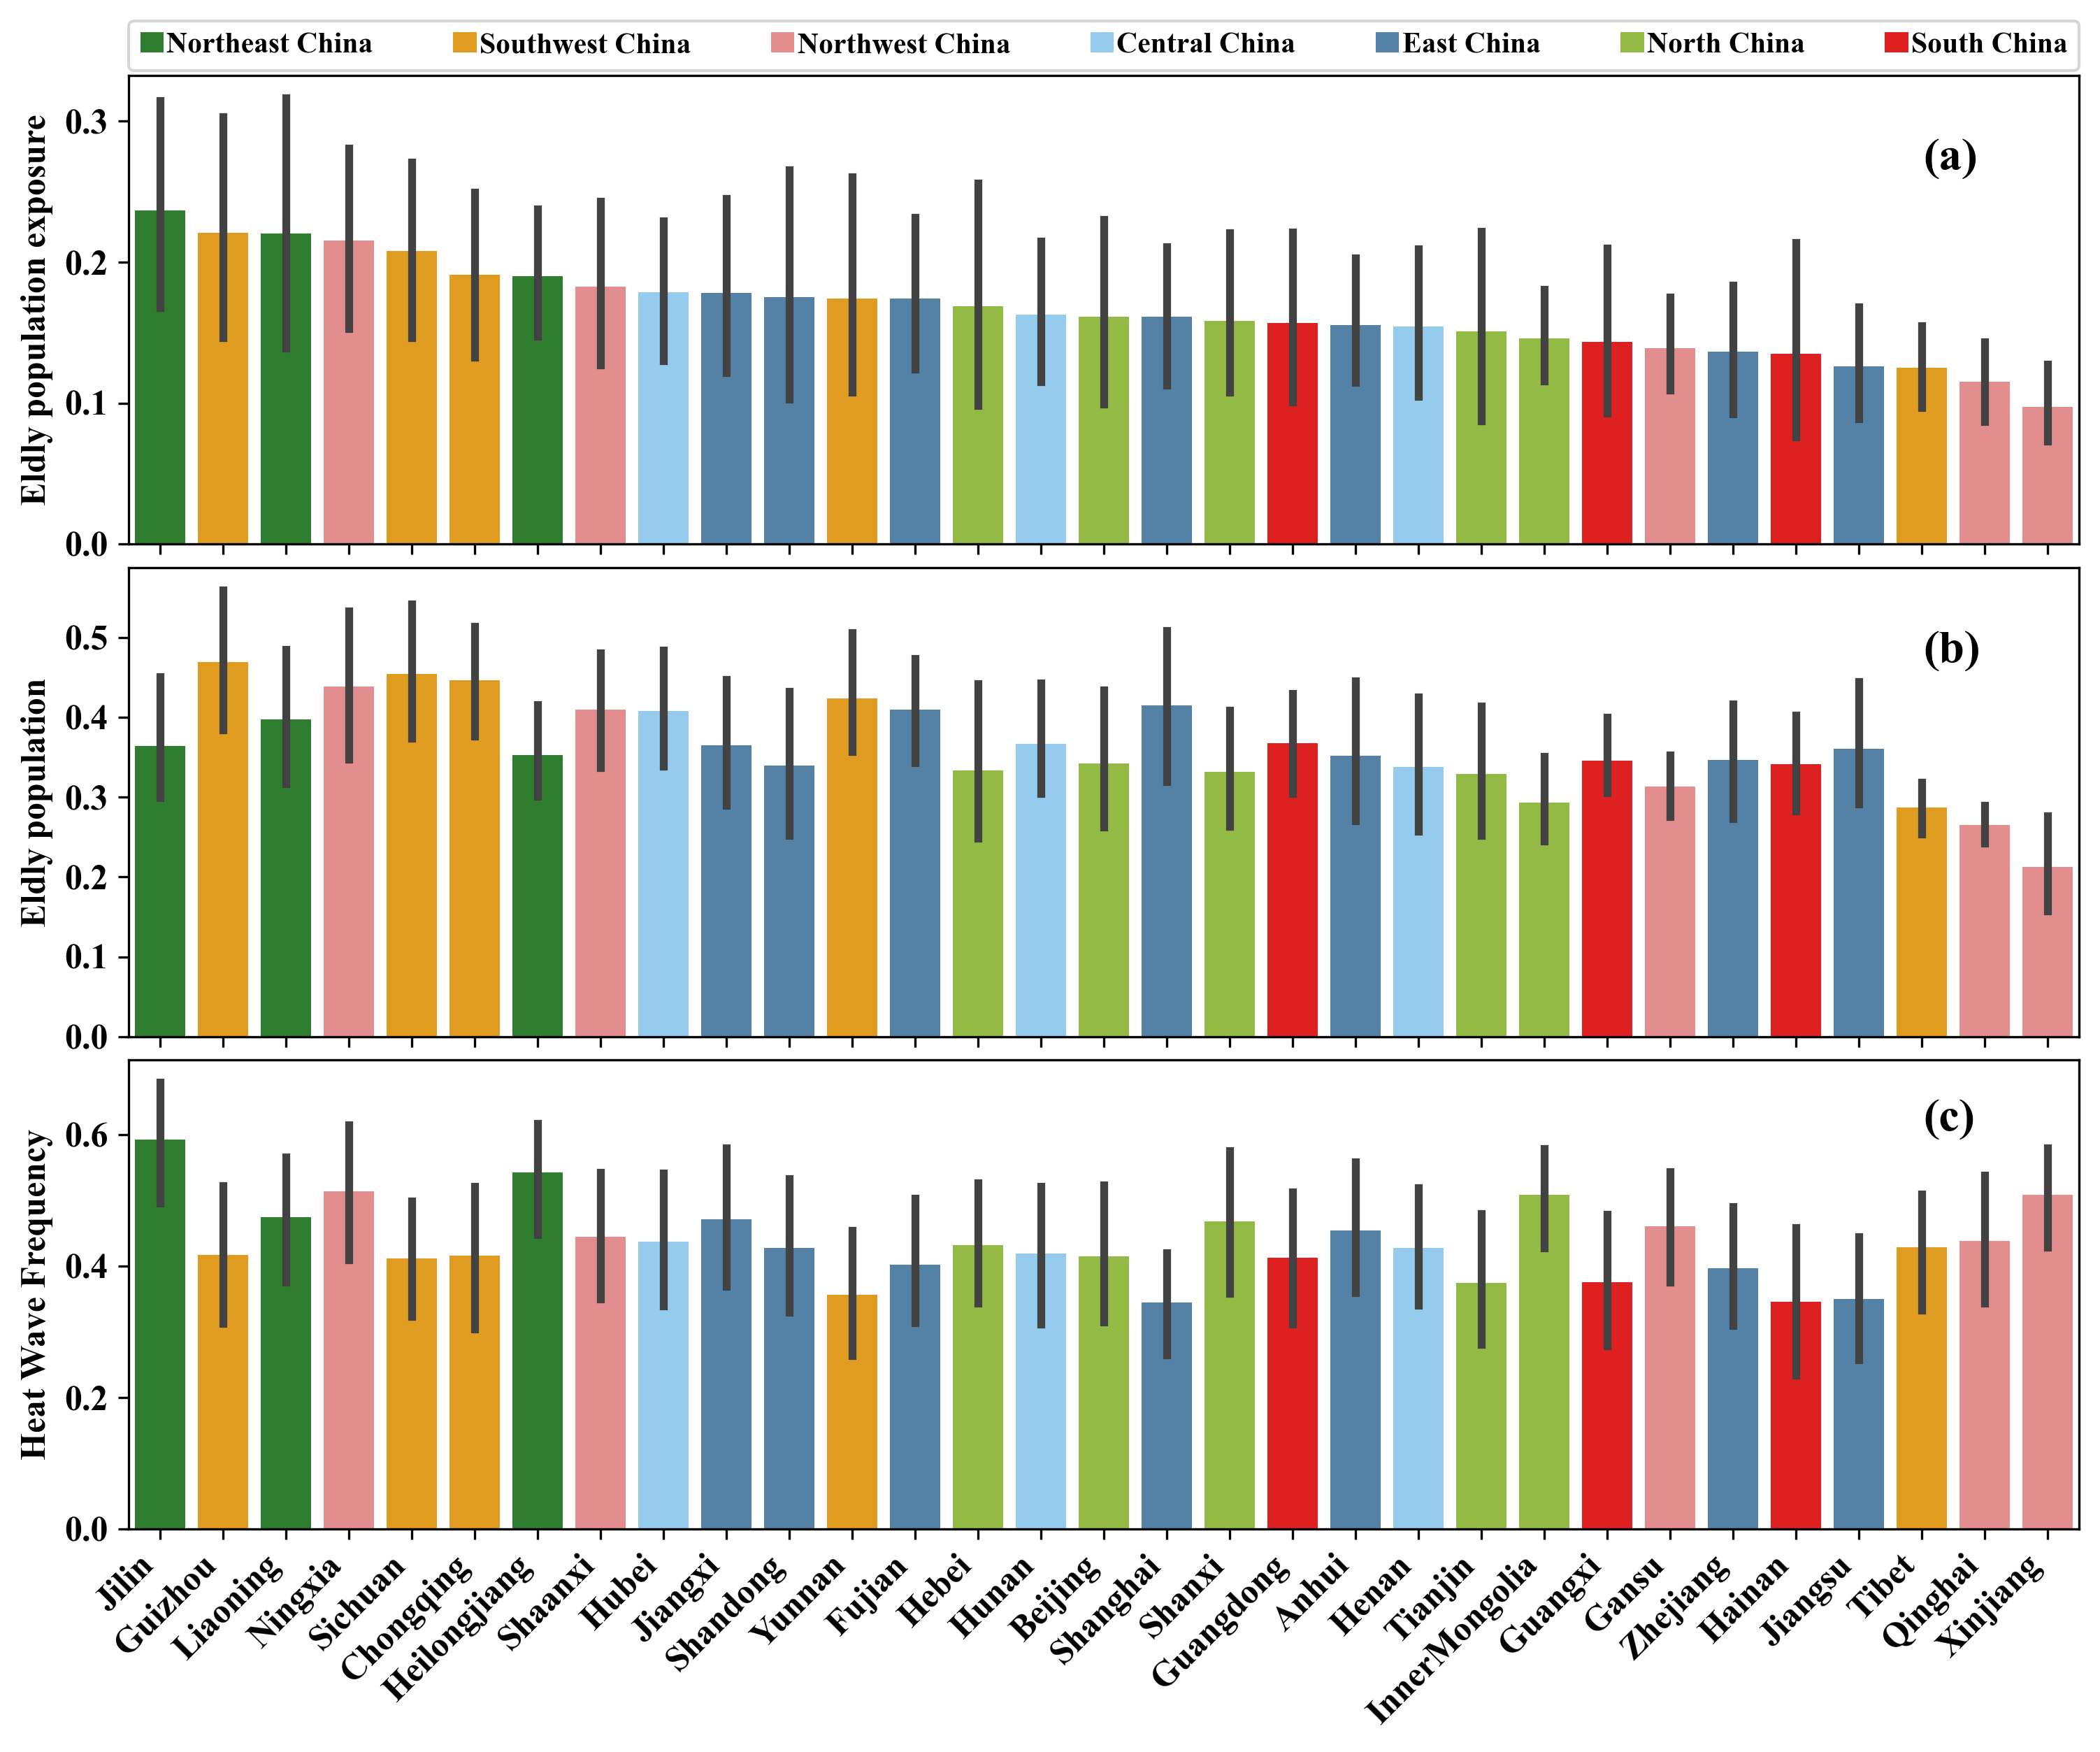

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define a custom function to calculate the median value
def get_median(group):
    return group['Eldly population exposure'].mean()

# Assuming 'df' contains the required data
# Sort the data based on the median value in descending order
sorted_data = df.groupby('Province').apply(get_median).sort_values(ascending=False).reset_index()
sorted_df = df.set_index('Province').loc[sorted_data['Province']].reset_index()

color_dict = {
    "East China": "steelblue",
    "North China": "yellowgreen",
    "Southwest China": "orange",
    "Northwest China": "lightcoral",
    "South China": "red",
    "Northeast China": "forestgreen",
    "Central China": "lightskyblue"
}

# Sort the data frame based on the sorted provinces
sorted_df['Province'] = pd.Categorical(sorted_df['Province'], categories=sorted_data['Province'], ordered=True)
sorted_df = sorted_df.sort_values('Province')

# Create the figure and axes
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(12, 9), dpi=300, sharex=True)
plt.subplots_adjust(hspace=0.05)

# Create the first barplot: Eldly population exposure
sns.barplot(x="Province", y="Eldly population exposure", data=sorted_df, hue='Region', palette=color_dict, dodge=False, ax=ax1)
ax1.get_legend().remove()

ax1.set_xlabel('')
# ax1.set_title('Eldly population exposure')

# Create the second barplot: Eldly population
sns.barplot(x="Province", y="Eldly population", data=sorted_df, hue='Region', palette=color_dict, dodge=False, ax=ax2)
ax2.get_legend().remove()
ax2.set_xlabel('')
# ax2.set_title('Eldly population')

# Create the third barplot: Heat Wave Frequency
sns.barplot(x="Province", y="Heat Wave Frequency", data=sorted_df, hue='Region', palette=color_dict, dodge=False, ax=ax3)
ax3.get_legend().remove()
ax3.set_xlabel('')
# ax3.set_title('Heat Wave Frequency')

# Set the x-axis labels
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')

ax1.text(0.92, 0.8, '(a)', transform=ax1.transAxes, size=16, weight='bold')
ax2.text(0.92, 0.8, '(b)', transform=ax2.transAxes, size=16, weight='bold')
ax3.text(0.92, 0.85, '(c)', transform=ax3.transAxes, size=16, weight='bold')

# Create a legend for the regions
import matplotlib.patches as mpatches
legend_patches = [mpatches.Patch(color=color, label=region) for region, color in color_dict.items()]
# fig.legend(handles=legend_patches, fontsize=10, bbox_to_anchor=(0.5, 0), loc='lower center', ncol=7)
leg=plt.legend(fontsize=10,bbox_to_anchor=(0, 3.11, 1,0.12), loc='lower left',handletextpad=0.1,
                      ncol=10, mode="expand", borderaxespad=0.,handlelength=0.8)
# Save and show the plot
plt.savefig('04git all—median-Exposure for each province-mean-new.png', dpi=300)
plt.show()

